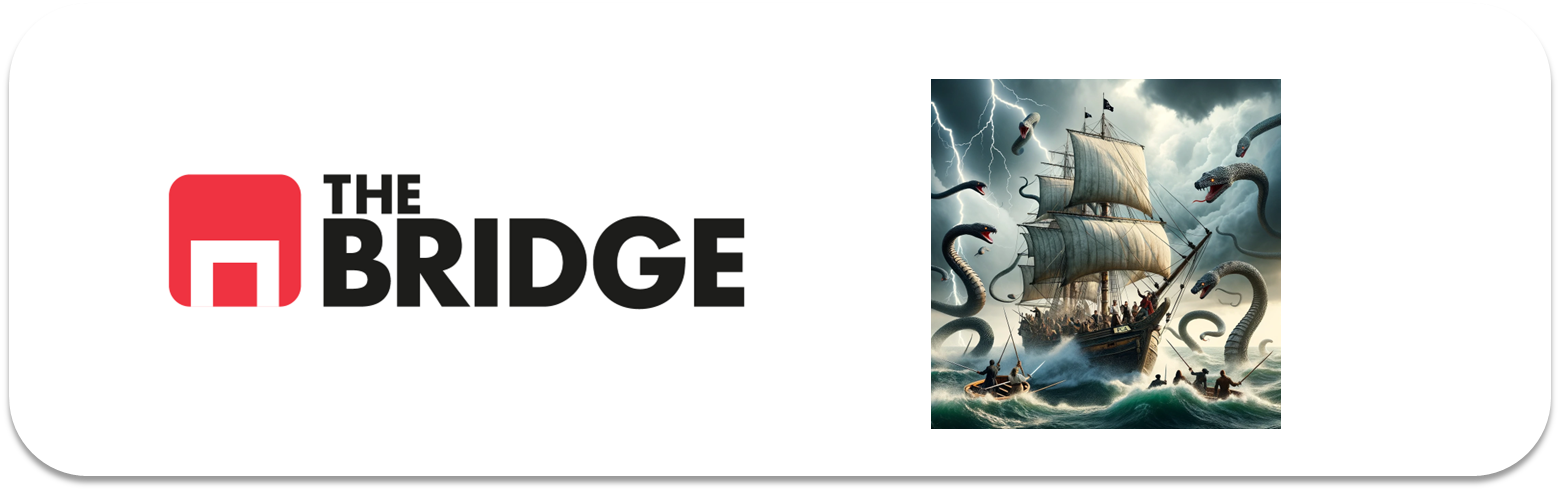

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [478]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import Toolbox_datascience as tds
import importlib 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score




In [479]:
importlib.reload(tds)

<module 'Toolbox_datascience' from 'c:\\Users\\rodri\\Git_Repositories\\ONLINE_DS_THEBRIDGE_ROD\\Sprint_14\\Unidad_02\\Practica_Obligatoria\\Toolbox_datascience.py'>

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [480]:
df = pd.read_csv('./data/credit_npo.csv')
df.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [482]:
df.dropna(inplace=True)

In [483]:
df_cardinalidad = tds.clasifica_variables(df,20,20)
df_cardinalidad

,nombre_variable,tipo_sugerido
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numérica Discreta
2,age,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Categórica
4,DebtRatio,Numérica Discreta
5,MonthlyIncome,Numérica Discreta
6,NumberOfOpenCreditLinesAndLoans,Numérica Discreta
7,NumberOfTimes90DaysLate,Categórica
8,NumberRealEstateLoansOrLines,Categórica
9,NumberOfTime60-89DaysPastDueNotWorse,Categórica


In [484]:
categorical_vars = df_cardinalidad[df_cardinalidad['tipo_sugerido'] == 'Categórica']['nombre_variable'].tolist()

In [485]:
for var in categorical_vars:
    print(f"Recuento de valores para {var}:")
    print(df[var].value_counts())
    print("\n")

Recuento de valores para NumberOfTime30-59DaysPastDueNotWorse:
NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64


Recuento de valores para NumberOfTimes90DaysLate:
NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
98       10
6         6
8         3
7         3
10        1
9         1
13        1
Name: count, dtype: int64


Recuento de valores para NumberRealEstateLoansOrLines:
NumberRealEstateLoansOrLines
0     4233
1     4149
2     2585
3      530
4      179
5       74
6       27
7       13
8        9
9        4
11       4
12       3
10       2
16       2
19       1
13       1
Name: count, dtype: int64


Recuento de valores para NumberOfTime60-89DaysPastDueNotWorse:
NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       478
2        85
3        18
4        14
98       10
5         4
11        1
Name: count, dtype: 

In [486]:
def asignar_categoria(valor):
    if valor == 0:
        return  0
    else:
        return 1

In [487]:
for var in categorical_vars:
    new_var = var + '_reduced'
    df[new_var] = df[var].apply(asignar_categoria)

In [488]:
df = df.drop(columns=categorical_vars)

In [489]:
for var in categorical_vars:
    print(f"Recuento de valores para {var}:")
    print(df[var +'_reduced'].value_counts())
    print("\n")

Recuento de valores para NumberOfTime30-59DaysPastDueNotWorse:
NumberOfTime30-59DaysPastDueNotWorse_reduced
0    9818
1    1998
Name: count, dtype: int64


Recuento de valores para NumberOfTimes90DaysLate:
NumberOfTimes90DaysLate_reduced
0    11156
1      660
Name: count, dtype: int64


Recuento de valores para NumberRealEstateLoansOrLines:
NumberRealEstateLoansOrLines_reduced
1    7583
0    4233
Name: count, dtype: int64


Recuento de valores para NumberOfTime60-89DaysPastDueNotWorse:
NumberOfTime60-89DaysPastDueNotWorse_reduced
0    11206
1      610
Name: count, dtype: int64


Recuento de valores para NumberOfDependents:
NumberOfDependents_reduced
0    6413
1    5403
Name: count, dtype: int64




In [490]:
df.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse_reduced,NumberOfTimes90DaysLate_reduced,NumberRealEstateLoansOrLines_reduced,NumberOfTime60-89DaysPastDueNotWorse_reduced,NumberOfDependents_reduced
0,0,0.081892,37,0.070709,5656.0,12,0,1,0,0,0
1,0,0.023413,74,0.209197,4870.0,9,0,0,1,0,0
2,0,0.000000,43,0.080784,5000.0,2,0,0,0,0,1
3,0,0.492754,44,0.412735,7333.0,4,0,0,1,0,1
4,0,1.000000,63,0.000000,8333.0,3,0,0,0,0,1


# EDA

In [491]:
target = 'SeriousDlqin2yrs'
features = df.columns.tolist()
features.remove(target)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [492]:
df_cardinalidad = tds.clasifica_variables(X_train,20,20)

In [493]:
features_cat = df_cardinalidad[(df_cardinalidad['tipo_sugerido'] == 'Categórica') | (df_cardinalidad['tipo_sugerido'] == 'Binaria')]['nombre_variable'].tolist()
features_num = df_cardinalidad[df_cardinalidad['tipo_sugerido'] == 'Numérica Discreta']['nombre_variable'].tolist()
print(features_cat)
print(features_num)

['NumberOfTime30-59DaysPastDueNotWorse_reduced', 'NumberOfTimes90DaysLate_reduced', 'NumberRealEstateLoansOrLines_reduced', 'NumberOfTime60-89DaysPastDueNotWorse_reduced', 'NumberOfDependents_reduced']
['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']


In [494]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[features_num] = scaler.fit_transform(X_train[features_num]) 
X_test[features_num] = scaler.fit_transform(X_test[features_num])

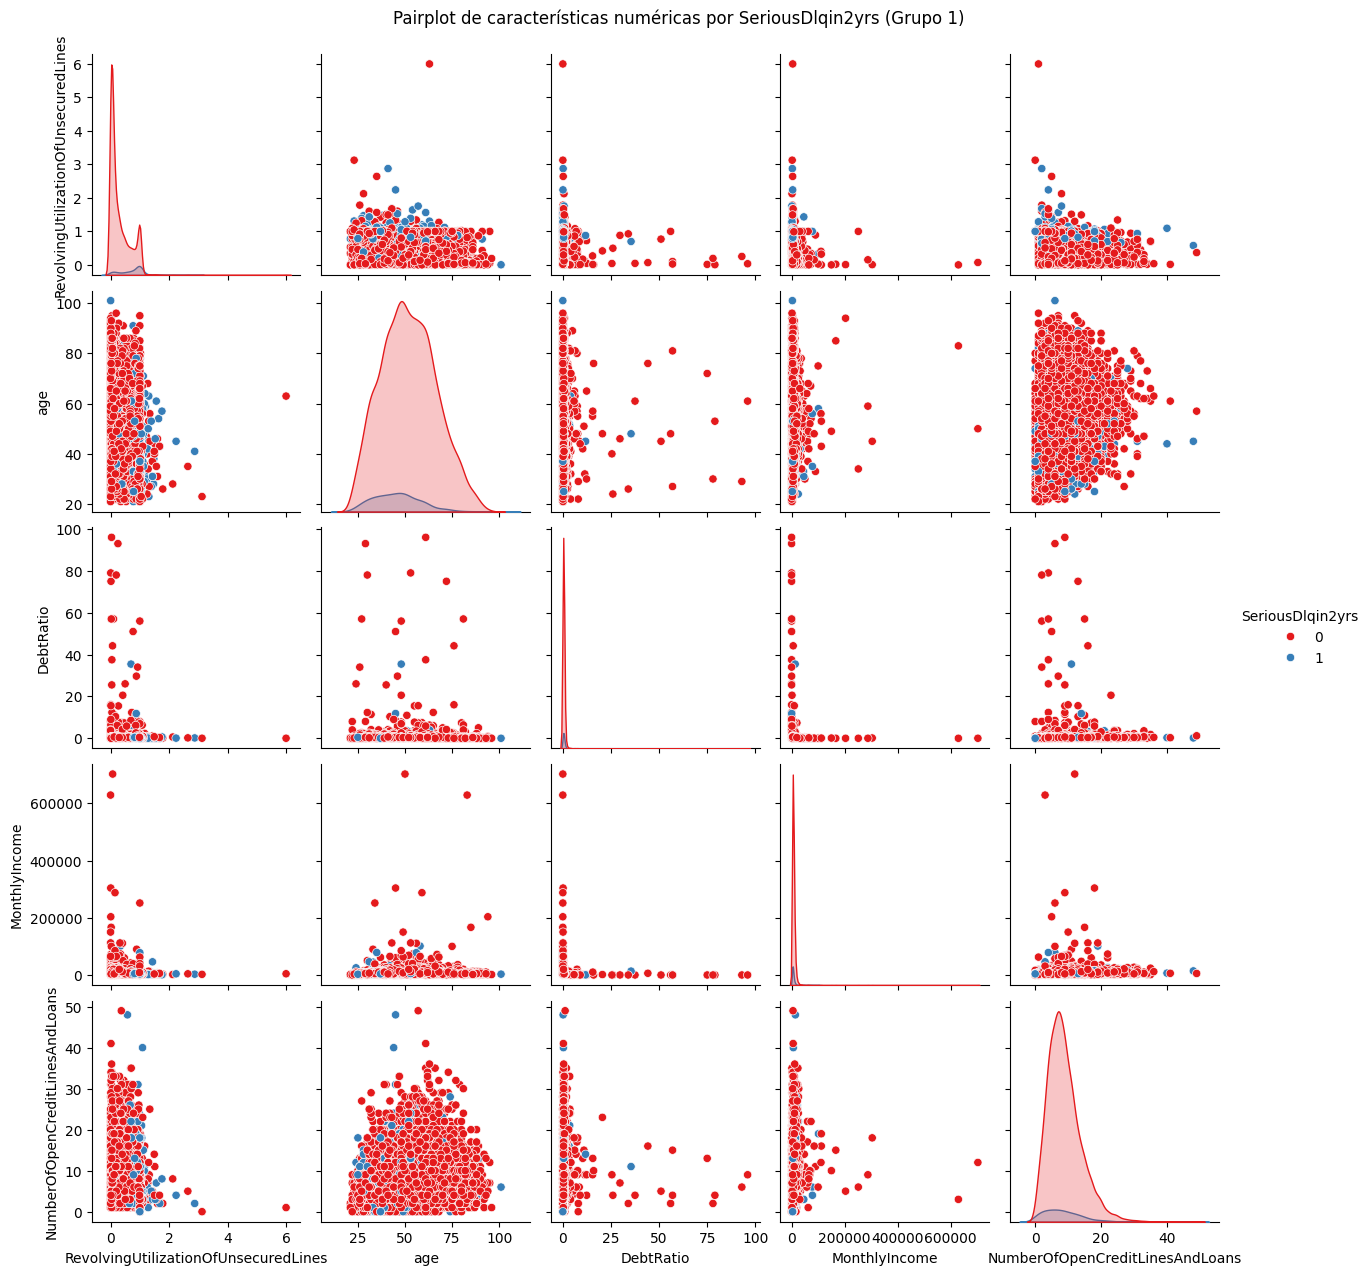

In [495]:
tds.plot_pairplots_by_category(df_train, features_num, target)

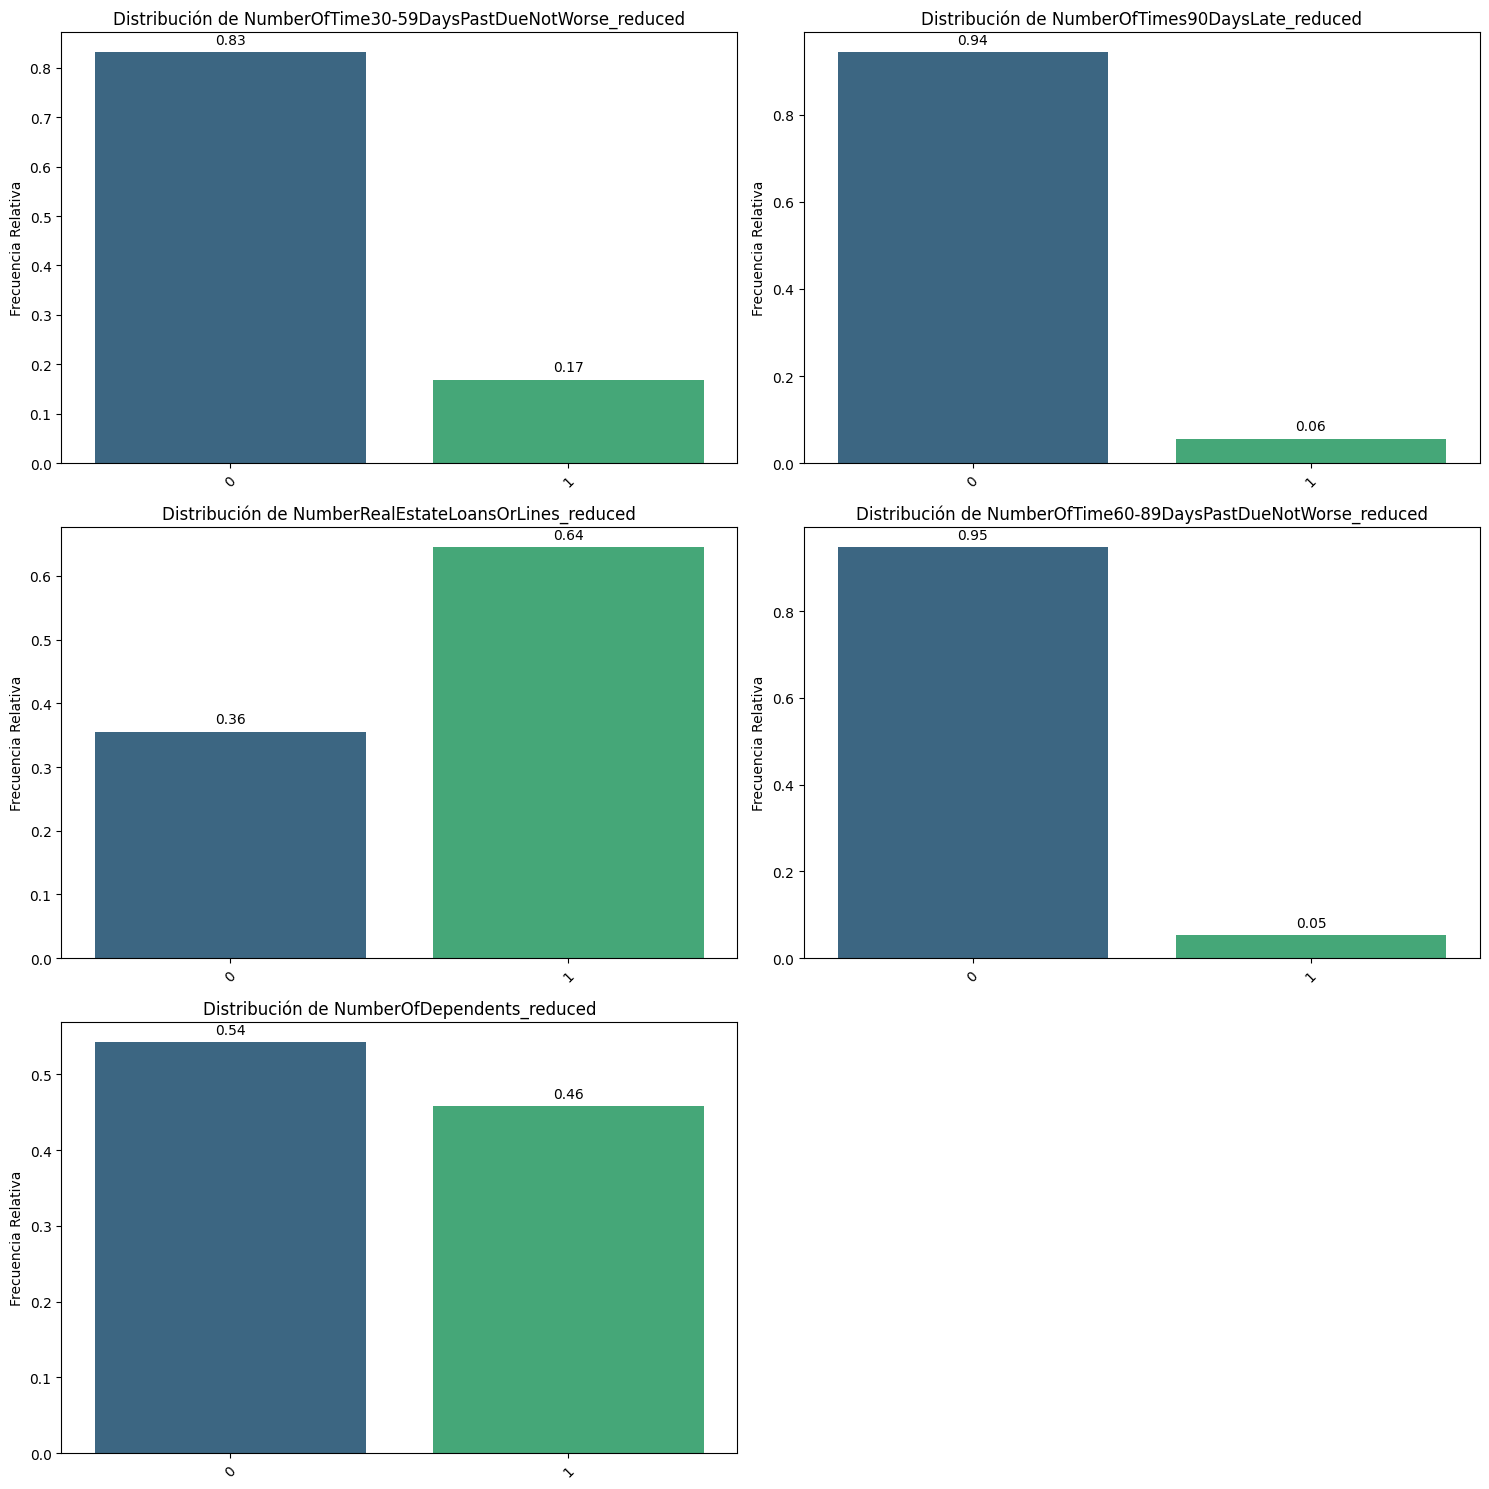

In [496]:
tds.pinta_distribucion_categoricas(df_train,features_cat,relativa=True,mostrar_valores=True)

In [497]:
correlation_matrix = df_train.corr()
correlation_matrix

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse_reduced,NumberOfTimes90DaysLate_reduced,NumberRealEstateLoansOrLines_reduced,NumberOfTime60-89DaysPastDueNotWorse_reduced,NumberOfDependents_reduced
SeriousDlqin2yrs,1.000000,0.284084,-0.107801,0.001863,-0.018163,-0.032472,0.241122,0.358480,-0.049861,0.246382,0.034496
RevolvingUtilizationOfUnsecuredLines,0.284084,1.000000,-0.257164,0.010163,-0.043939,-0.161180,0.257790,0.302539,-0.134230,0.206578,0.059786
age,-0.107801,-0.257164,1.000000,-0.010456,0.051817,0.172519,-0.080281,-0.100881,0.100211,-0.070690,-0.183930
DebtRatio,0.001863,0.010163,-0.010456,1.000000,-0.033834,0.034363,0.001559,-0.003422,0.015436,-0.006794,-0.008887
MonthlyIncome,-0.018163,-0.043939,0.051817,-0.033834,1.000000,0.096467,-0.010815,-0.035664,0.107893,-0.021904,0.068343
NumberOfOpenCreditLinesAndLoans,-0.032472,-0.161180,0.172519,0.034363,0.096467,1.000000,0.048014,-0.127042,0.381230,-0.046170,0.059896
NumberOfTime30-59DaysPastDueNotWorse_reduced,0.241122,0.257790,-0.080281,0.001559,-0.010815,0.048014,1.000000,0.249757,-0.004915,0.273726,0.048393
NumberOfTimes90DaysLate_reduced,0.358480,0.302539,-0.100881,-0.003422,-0.035664,-0.127042,0.249757,1.000000,-0.119571,0.317622,0.023014
NumberRealEstateLoansOrLines_reduced,-0.049861,-0.134230,0.100211,0.015436,0.107893,0.381230,-0.004915,-0.119571,1.000000,-0.051240,0.163896
NumberOfTime60-89DaysPastDueNotWorse_reduced,0.246382,0.206578,-0.070690,-0.006794,-0.021904,-0.046170,0.273726,0.317622,-0.051240,1.000000,0.023327


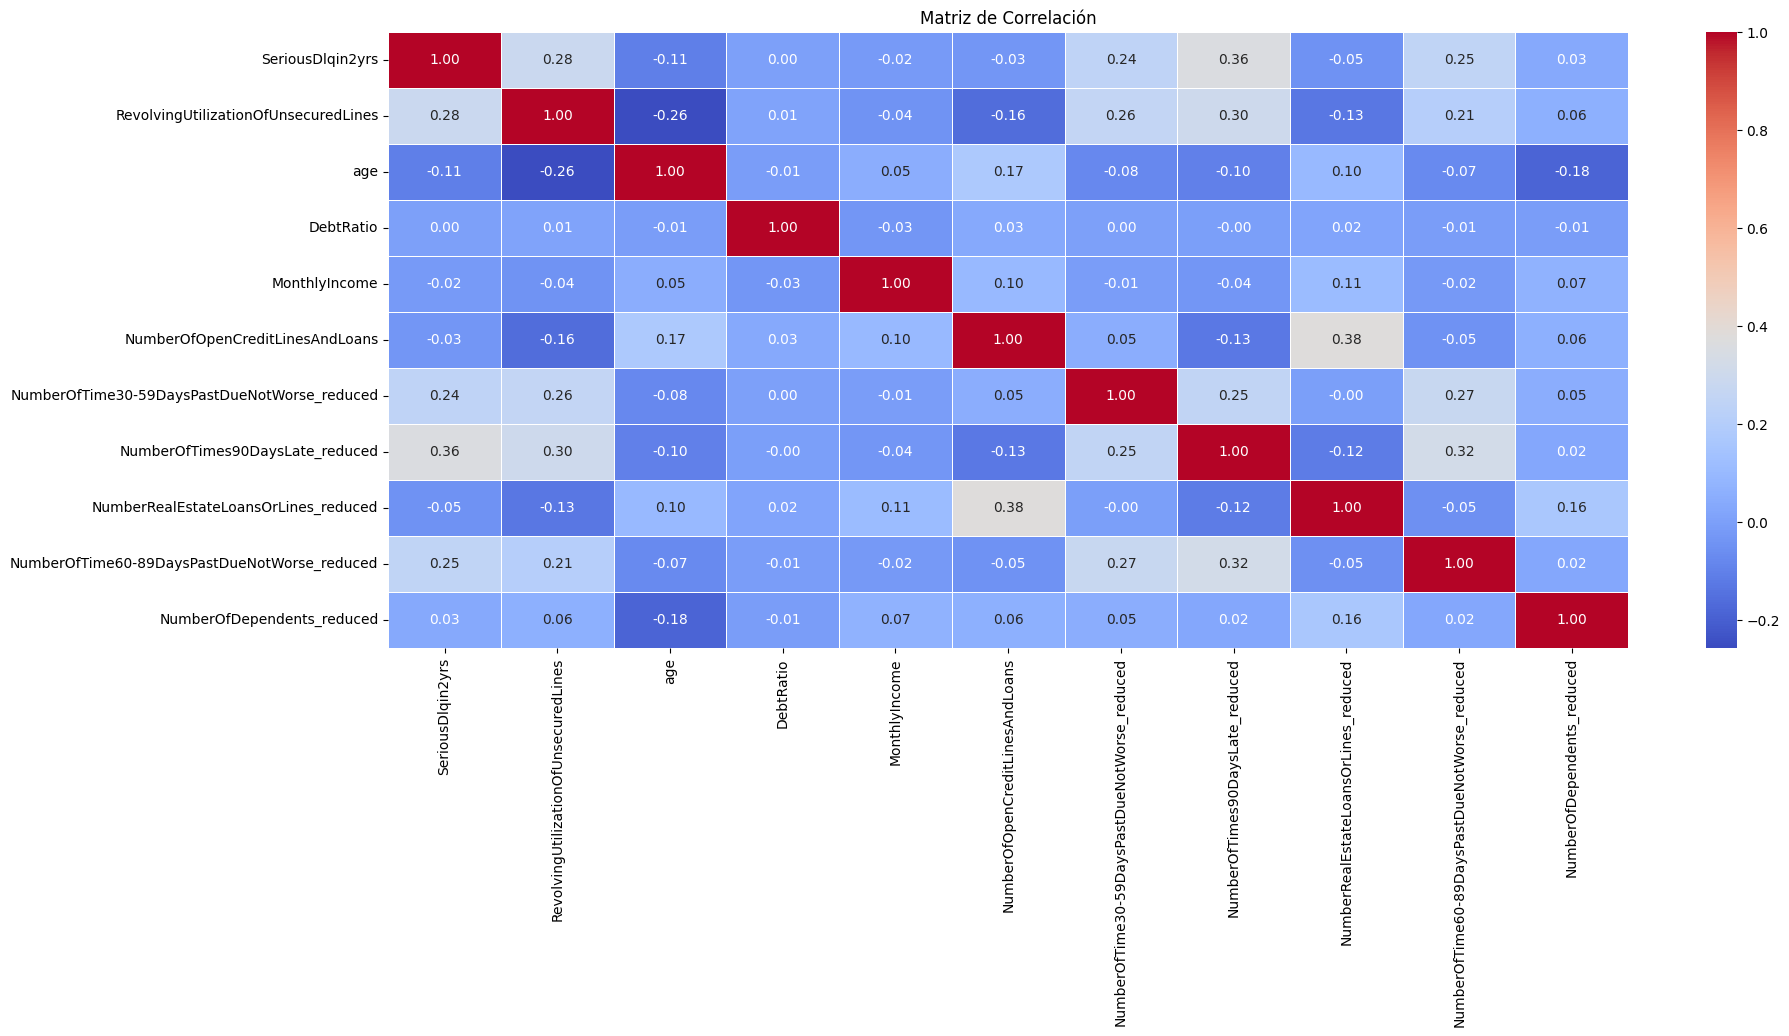

In [498]:
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

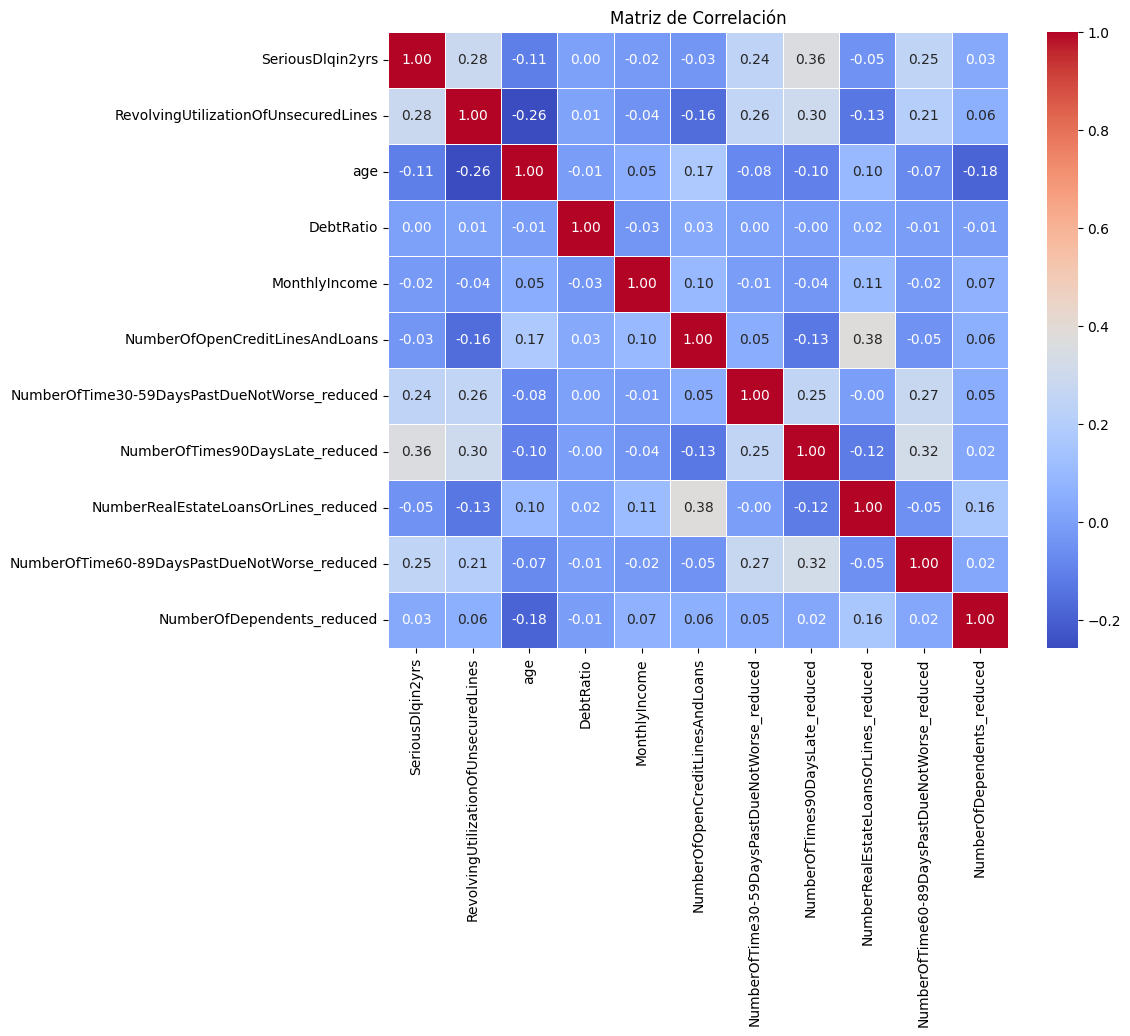

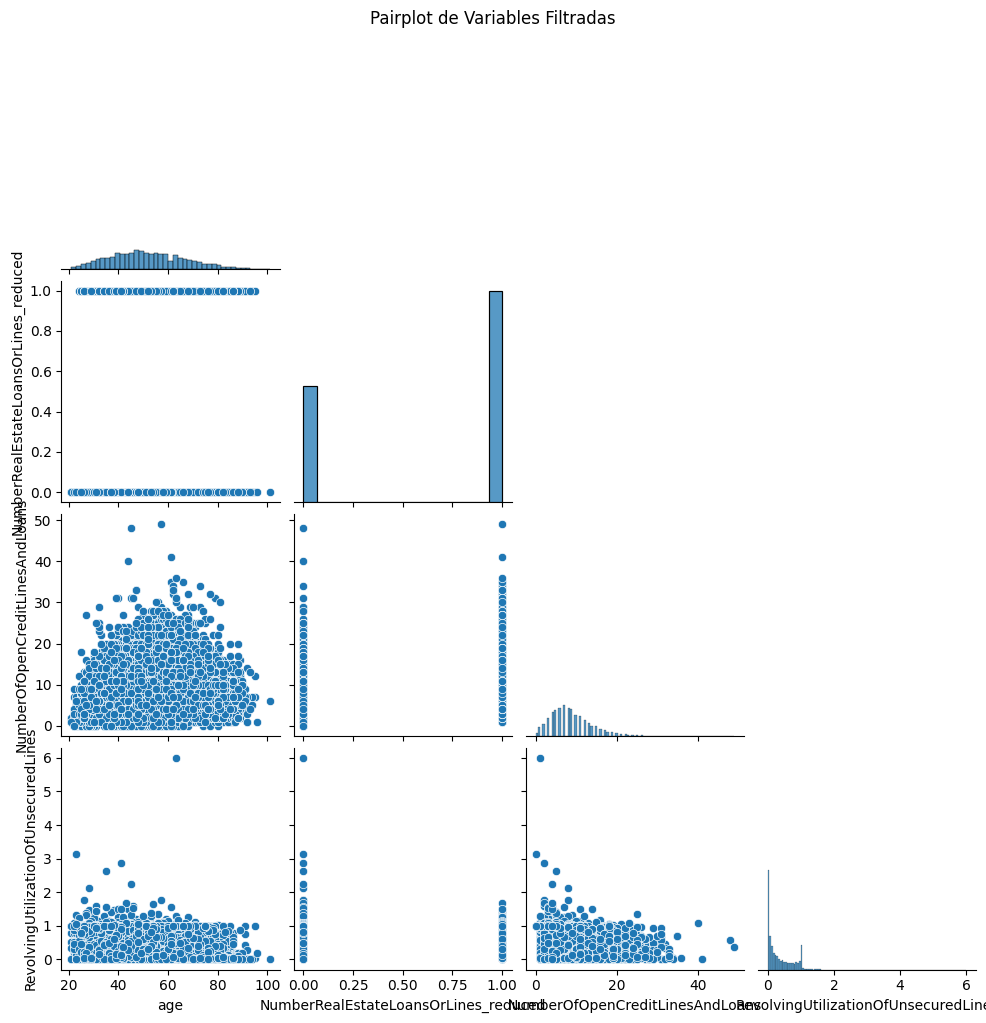

,age,NumberRealEstateLoansOrLines_reduced,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines
11145,68,1,13,0.391240
2012,59,0,7,0.906540
5428,52,1,3,0.933223
12130,50,1,9,0.857859
36,61,1,5,0.000000
...,...,...,...,...
11966,53,1,14,0.397822
5512,76,0,4,0.015171
5719,62,1,4,0.988201
922,41,1,9,0.122072


In [499]:
tds.analyze_correlation_and_covariance(df_train, corr_threshold=0.2, cov_threshold=0.2)

# MUTUAL INFORMATION CATEGORICS

In [500]:
features_cat_mutual = []
for col in features_cat:
    print(f"MI({col};{target}):", mutual_info_score(df_train[col],df_train[target]))
    if mutual_info_score(df_train[col],df_train[target]) > 0.01:
        features_cat_mutual.append(col)

print(features_cat_mutual)

MI(NumberOfTime30-59DaysPastDueNotWorse_reduced;SeriousDlqin2yrs): 0.022123038340812945
MI(NumberOfTimes90DaysLate_reduced;SeriousDlqin2yrs): 0.03421467132247159
MI(NumberRealEstateLoansOrLines_reduced;SeriousDlqin2yrs): 0.0012088013208417514
MI(NumberOfTime60-89DaysPastDueNotWorse_reduced;SeriousDlqin2yrs): 0.017771329855032478
MI(NumberOfDependents_reduced;SeriousDlqin2yrs): 0.000592565263492828
['NumberOfTime30-59DaysPastDueNotWorse_reduced', 'NumberOfTimes90DaysLate_reduced', 'NumberOfTime60-89DaysPastDueNotWorse_reduced']


# ANOVA

In [501]:
features_num_anova = []

for i in features_num:
    # Agrupar los valores de la columna `i` por las categorías de `target`
    target_values = [
        df_train[df_train[target] == categoria][i].tolist() for categoria in quality_cat
    ]
    
    # Realizar ANOVA (F-test) entre los grupos
    f_val, p_val = stats.f_oneway(*target_values)  # El * descompone la lista en argumentos separados
    
    # Imprimir los resultados de ANOVA para la característica actual
    print(f"ANOVA para {i}:")
    print("Valor F:", f_val)
    print("Valor p:", p_val)
    print("-" * 40)

    if p_val < 0.05:
        print(f"La característica {i} es estadísticamente significativa")
        features_num_anova.append(i)

ANOVA para RevolvingUtilizationOfUnsecuredLines:
Valor F: 829.6026054037535
Valor p: 6.129144003575496e-175
----------------------------------------
La característica RevolvingUtilizationOfUnsecuredLines es estadísticamente significativa
ANOVA para age:
Valor F: 111.11054809356344
Valor p: 7.783159432475393e-26
----------------------------------------
La característica age es estadísticamente significativa
ANOVA para DebtRatio:
Valor F: 0.03279494614663638
Valor p: 0.8562978742165581
----------------------------------------
ANOVA para MonthlyIncome:
Valor F: 3.118381710974996
Valor p: 0.07744591410849191
----------------------------------------
ANOVA para NumberOfOpenCreditLinesAndLoans:
Valor F: 9.97516758622786
Valor p: 0.001591651601814434
----------------------------------------
La característica NumberOfOpenCreditLinesAndLoans es estadísticamente significativa


# KBESTS

In [502]:
selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train[features_num], y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
0,0.154698,1.138630,0.881104,-0.373806,0.818276
1,1.577335,0.517878,-0.064202,-0.029605,-0.349202
2,1.651001,0.035070,-0.045353,0.110460,-1.127520
3,1.442938,-0.102875,0.010001,-0.130639,0.039958
4,-0.925438,0.655823,-0.028696,-0.135329,-0.738361
...,...,...,...,...,...
9447,0.172869,0.104043,-0.061265,0.372943,1.012856
9448,-0.883555,1.690410,-0.191872,-0.267763,-0.932941
9449,1.802784,0.724795,-0.014218,0.125086,-0.932941
9450,-0.588421,-0.723628,0.060715,-0.247970,0.039958


# SELECT FROM MODEL

In [503]:
rf_selector = RandomForestClassifier(random_state= 42)
rf_selector.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [504]:
from sklearn.feature_selection import SelectFromModel
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median") # El modelo debe tener un atributo feature_importances_ o un atributo coef_
selector_model.fit(X_train, y_train) 

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [505]:
features_kbest = selector_model.get_feature_names_out()
features_kbest

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'], dtype=object)

# RFE

In [506]:
from sklearn.feature_selection import RFE

X_train_rfe = X_train.copy()
y_train_rfe = y_train.copy()
 
features = X_train.columns

rf_RFE = RandomForestClassifier(random_state= 42) # Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train_rfe, y_train_rfe)
print(rfe.ranking_)
df_rfe = pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features).sort_values("ranking")
df_rfe

[1 1 1 1 1 3 2 6 4 5]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1
NumberOfOpenCreditLinesAndLoans,1
NumberOfTimes90DaysLate_reduced,2
NumberOfTime30-59DaysPastDueNotWorse_reduced,3
NumberOfTime60-89DaysPastDueNotWorse_reduced,4
NumberOfDependents_reduced,5
NumberRealEstateLoansOrLines_reduced,6


In [507]:
features_rfe = df_rfe[(df_rfe["ranking"] == 1) | (df_rfe["ranking"] == 2)].index.tolist()
features_rfe

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate_reduced']

# SFS

In [508]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=5, scoring='balanced_accuracy')

In [509]:
features_SFS = sfs_forward.get_feature_names_out()
print("Elegidasd SFS:", sfs_forward.get_feature_names_out())

Elegidasd SFS: ['RevolvingUtilizationOfUnsecuredLines' 'NumberOfOpenCreditLinesAndLoans'
 'NumberOfTimes90DaysLate_reduced' 'NumberRealEstateLoansOrLines_reduced'
 'NumberOfDependents_reduced']


# HARD-VOTING

In [510]:
from collections import Counter
features_kbest = features_kbest.tolist() if isinstance(features_kbest, np.ndarray) else features_kbest
features_SFS = features_SFS.tolist() if isinstance(features_SFS, np.ndarray) else features_SFS

all_selected_features = features_cat_mutual + features_rfe + features_kbest + features_num_anova + features_SFS
all_selected_features = features_cat_mutual + features_rfe + features_kbest + features_num_anova + features_SFS

feature_counts = Counter(all_selected_features)
sorted_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)
top_6_features = [feature for feature, count in sorted_features[:6]]

print("Top 6 características seleccionadas por hard-voting:", top_6_features)

Top 6 características seleccionadas por hard-voting: ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate_reduced', 'age', 'DebtRatio', 'MonthlyIncome']


# 3.ENTRENAR

In [514]:

# Lista de modelos a probar
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42))
]

# Lista de las características seleccionadas
feature_sets = [
    features_cat_mutual, 
    features_rfe, 
    features_kbest, 
    features_num_anova, 
    features_SFS, 
    top_6_features  ]

# Función para calcular el recall medio usando cross_val_score
def get_mean_recall(model, X, y):
    recall_scorer = make_scorer(recall_score)
    return cross_val_score(model, X, y, cv=5, scoring=recall_scorer).mean()

# Almacenar resultados
results = []

# Entrenamos y evaluamos cada modelo para cada conjunto de características
for model_name, model in models:
    for idx, features in enumerate(feature_sets):  # Enumeramos para generar nombres automáticos
        X_train_features = X_train[features]  # Seleccionamos solo las características correspondientes
        mean_recall = get_mean_recall(model, X_train_features, y_train)
        results.append({
            "Model": model_name, 
            "Features": len(features), 
            "Mean Recall": mean_recall, 
            "Feature Set Name": f"set_{idx}"  # Nombre automático basado en el índice
        })

# Convertimos los resultados en un DataFrame de Pandas
df_results = pd.DataFrame(results)

# Mostramos el DataFrame
print(df_results)


                  Model  Features  Mean Recall Feature Set Name
0   Logistic Regression         3     0.108635            set_0
1   Logistic Regression         6     0.190134            set_1
2   Logistic Regression         5     0.015095            set_2
3   Logistic Regression         3     0.013591            set_3
4   Logistic Regression         5     0.176566            set_4
5   Logistic Regression         6     0.190134            set_5
6         Random Forest         3     0.116154            set_0
7         Random Forest         6     0.173502            set_1
8         Random Forest         5     0.069378            set_2
9         Random Forest         3     0.110071            set_3
10        Random Forest         5     0.220335            set_4
11        Random Forest         6     0.184062            set_5
12    Gradient Boosting         3     0.108635            set_0
13    Gradient Boosting         6     0.170563            set_1
14    Gradient Boosting         5     0.

In [516]:
# Identificamos el mejor modelo y las mejores características
best_result = df_results.loc[df_results["Mean Recall"].idxmax()]
print("\nBest Model and Features Selection:")
print(best_result)


Best Model and Features Selection:
Model               Random Forest
Features                        5
Mean Recall              0.220335
Feature Set Name            set_4
Name: 10, dtype: object


# 4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

In [533]:
# Obtener la mejor fila (índice 10) del dataframe result_df
best_model_row = df_results.loc[10]

# Extraer información relevante
best_model_name = best_model_row["Model"]  # 'Random Forest'
best_feature_set_name = best_model_row["Feature Set Name"]  # 'set_4'
best_feature_count = best_model_row["Features"]  # 5


In [534]:
feature_sets_dict = {f"set_{i}": features for i, features in enumerate(feature_sets)}

# Obtener la lista de características correspondiente usando el diccionario
best_features = feature_sets_dict[best_feature_set_name]

# Definir los subconjuntos de entrenamiento y test
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Asegurar que X_test_best tiene las mismas columnas que X_train_best
X_test_best = X_test_best.reindex(columns=X_train_best.columns, fill_value=0)

In [535]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Crear el modelo base
rf_model = RandomForestClassifier(random_state=42)

# Aplicar RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, 
    n_iter=20, scoring="recall", cv=5, random_state=42, n_jobs=-1
)

# Entrenar con los datos filtrados
random_search.fit(X_train_best, y_train)

# Obtener el mejor modelo optimizado
best_rf_model = random_search.best_estimator_

# Evaluar en test
y_test_pred = best_rf_model.predict(X_test_best)
test_recall = recall_score(y_test, y_test_pred)

# Mostrar resultados
print("Mejores hiperparámetros:", random_search.best_params_)
print("Recall en test:", test_recall)



Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50}
Recall en test: 0.1437125748502994


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.